In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_model(model, X_test, y_test, y_pred):
    """
    Evaluate the model and print the scores
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{model}:\n Accuracy: {accuracy*100:.2f}%\n Precision: {precision:.2f}\n Recall: {recall:.2f}\n F1-Score: {f1:.2f}\n")

# Initialize, fit, predict and evaluate Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
evaluate_model("Decision Tree Classifier", X_test, y_test, y_pred_tree)

# Initialize, fit, predict and evaluate Random Forest classifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
evaluate_model("Random Forest Classifier", X_test, y_test, y_pred_forest)

# Initialize, fit, predict and evaluate SVM classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
evaluate_model("SVM Classifier", X_test, y_test, y_pred_svm)

Decision Tree Classifier:
 Accuracy: 100.00%
 Precision: 1.00
 Recall: 1.00
 F1-Score: 1.00

Random Forest Classifier:
 Accuracy: 100.00%
 Precision: 1.00
 Recall: 1.00
 F1-Score: 1.00

SVM Classifier:
 Accuracy: 100.00%
 Precision: 1.00
 Recall: 1.00
 F1-Score: 1.00



SVM Classifier:
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



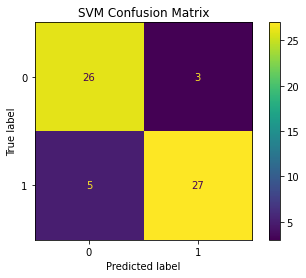

LogisticRegression Classifier:
Best Parameters: {'C': 1}
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



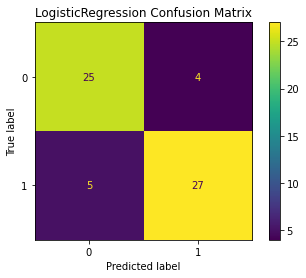

DecisionTree Classifier:
Best Parameters: {'criterion': 'entropy', 'max_depth': 20}
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



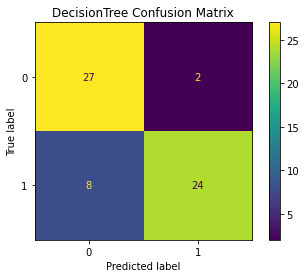

RandomForest Classifier:
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 10}
Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



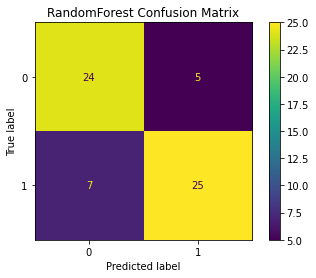

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = data['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters
models_params = {
    'SVM': {
        'model': SVC(),
        'params': {'kernel': ['linear', 'rbf'], 'C': [1, 10, 20]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [1, 5, 10]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}
    }
}

# Initialize and train models with GridSearchCV
for name, mp in models_params.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        (name, GridSearchCV(mp['model'], mp['params'], cv=5))
    ])
    pipe.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = pipe.predict(X_test)
    print(f"{name} Classifier:")
    print(f"Best Parameters: {pipe.named_steps[name].best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(classification_report(y_test, predictions))
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)  # Assuming 'target' is the column with labels
y = data['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
svm_classifier = SVC(kernel='linear')
log_reg_classifier = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()

# Train classifiers
svm_classifier.fit(X_train, y_train)
log_reg_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

# Make predictions
svm_pred = svm_classifier.predict(X_test)
log_reg_pred = log_reg_classifier.predict(X_test)
decision_tree_pred = decision_tree_classifier.predict(X_test)
random_forest_pred = random_forest_classifier.predict(X_test)

# Evaluate classifiers
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

print("\nLogistic Regression Classifier:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(classification_report(y_test, log_reg_pred))
print(confusion_matrix(y_test, log_reg_pred))

print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, decision_tree_pred)}")
print(classification_report(y_test, decision_tree_pred))
print(confusion_matrix(y_test, decision_tree_pred))

print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, random_forest_pred)}")
print(classification_report(y_test, random_forest_pred))
print(confusion_matrix(y_test, random_forest_pred))


SVM Classifier:
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[25  4]
 [ 4 28]]

Logistic Regression Classifier:
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[25  4]
 [ 5 27]]

Decision Tree Classifier:
Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75    

SVM Classifier:
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



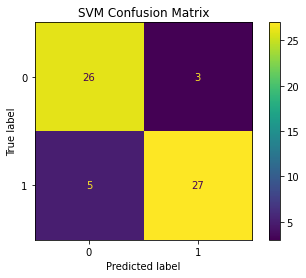

LogisticRegression Classifier:
Best Parameters: {'C': 1}
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



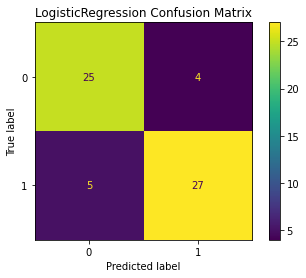

DecisionTree Classifier:
Best Parameters: {'criterion': 'gini', 'max_depth': 10}
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



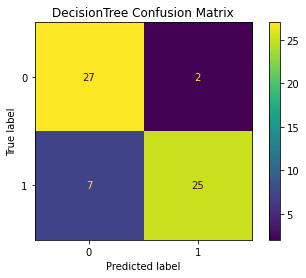

RandomForest Classifier:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



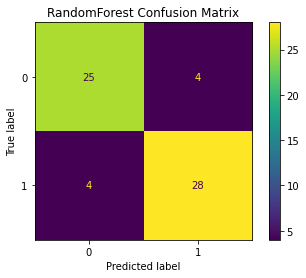

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier:
Accuracy: 0.9180327868852459
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



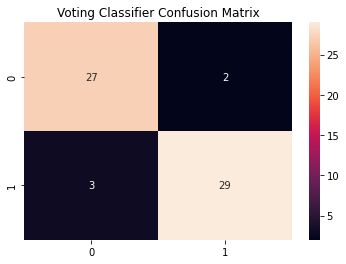

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = data['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters
models_params = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {'kernel': ['linear', 'rbf'], 'C': [1, 10, 20]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [1, 5, 10]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}
    }
}

# Initialize and train models with GridSearchCV, then add them to a list
trained_models = []
for name, mp in models_params.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        (name, GridSearchCV(mp['model'], mp['params'], cv=5))
    ])
    pipe.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = pipe.predict(X_test)
    print(f"{name} Classifier:")
    print(f"Best Parameters: {pipe.named_steps[name].best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(classification_report(y_test, predictions))
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    trained_models.append(pipe.named_steps[name].best_estimator_)

# Ensemble method - Voting Classifier
voting_classifier = VotingClassifier(estimators=[(name, model) for name, model in zip(models_params.keys(), trained_models)], voting='soft')
voting_classifier.fit(X_train, y_train)

# Predict and evaluate using Voting Classifier
voting_predictions = voting_classifier.predict(X_test)
print("Voting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, voting_predictions)}")
print(classification_report(y_test, voting_predictions))
conf_matrix = confusion_matrix(y_test, voting_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Voting Classifier Confusion Matrix")
plt.show()
